In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# NEW PATHWAYS NEW PHOSPHOPROTEOMICS

# Finding path to new phosphoproteomics file
PATH_phos = '/Users/ninazomorrodnia/Desktop/Bachelor datamapper/'
FILE_PATHWAYS = PATH_phos + 'Reactome pathways new phospho.xlsx'

# Reading in protein refeeding data as a Pandas DataFrame
df_pathways = pd.read_excel(FILE_PATHWAYS)
df_pathways.head()

,Reactome pathways,WT T1,FDR WT T1,Fold_enrich_WT T1,WT T6,FDR WT T6,Fold_enrich_WT T6,HR3 T1,FDR HR3 T1,Fold_enrich_HR3 T1,HR3 T6,FDR HR3 T6,Fold_enrich_HR3 T6,TOR T1,FDR TOR T1,Fold_enrich_TOR T1,TOR T6,FDR TOR T6,Fold_enrich_TOR T6
0,mRNA Splicing,x,1.790000e-08,6.02,x,6.130000e-08,5.40,x,0.000003,4.88,x,8.690000e-08,5.28,x,9.660000e-07,5.08,x,1.130000e-08,6.08
1,Processing of Capped Intron-Containing Pre-mRNA,x,8.420000e-08,4.89,x,1.610000e-06,4.28,x,0.000003,4.21,x,1.270000e-07,4.50,x,4.140000e-06,4.21,x,1.900000e-07,4.81
2,Metabolism of RNA,x,1.760000e-06,3.07,x,1.280000e-08,3.32,x,0.000001,3.05,x,1.570000e-07,3.05,x,6.640000e-08,3.26,x,1.130000e-07,3.31
3,Gene expression (Transcription),x,2.100000e-03,2.31,x,6.820000e-05,2.46,x,0.000487,2.31,x,1.570000e-03,2.20,x,5.150000e-03,2.16,x,5.880000e-05,2.57
4,mRNA 3'-end processing,x,2.490000e-03,7.20,x,6.320000e-04,7.27,x,0.000022,8.60,x,2.520000e-04,7.51,x,9.180000e-05,8.21,x,6.270000e-06,9.82


In [2]:
data = df_pathways.drop('Reactome pathways', axis=1).to_numpy()
data.shape

(23, 18)

In [3]:
# Selecting the first row of the dataset, df_pathways.
df_pathways.iloc[0]['WT T1']

# 'iloc' is used to access DataFrame elements by integer-based indexing. 

'x'

In [4]:
dict = {
    'WT': 'b',
    'HR3': 'k',
    'TOR': 'r',
    'T1': '^',
    'T6': 'o'
}

In [5]:
color_dict = {
    'WT': 'paleturquoise',
    'HR3': 'mediumpurple',
    'TOR': 'gold'
}

In [7]:
genotypes = ['WT', 'HR3', 'TOR']
times = ['T1', 'T6']

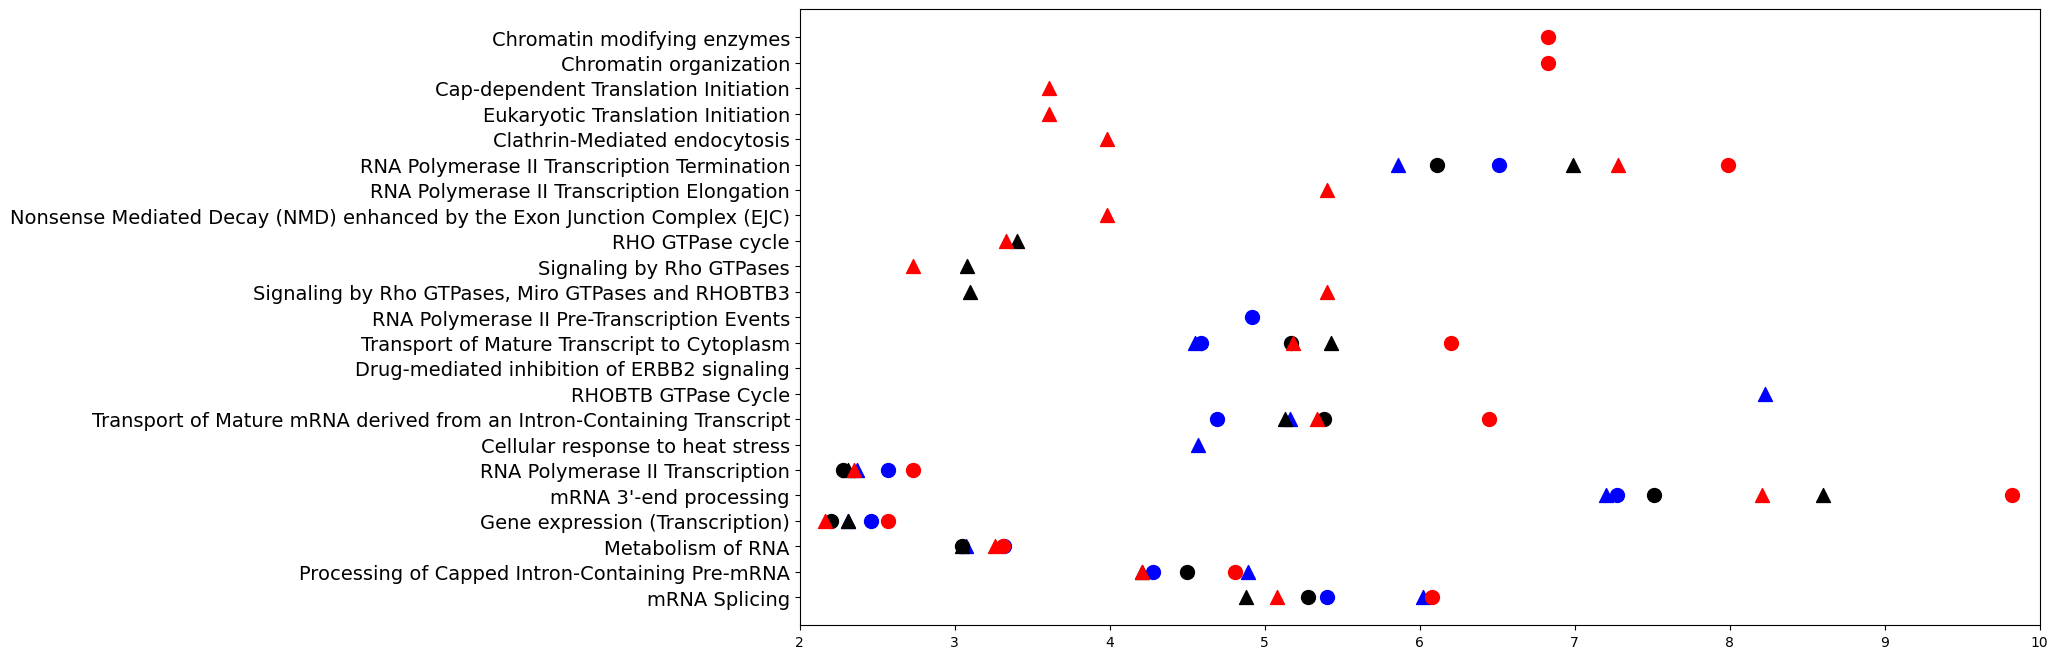

In [10]:
fig, ax = plt.subplots(1,1, figsize=(16, 8))

pathways = df_pathways['Reactome pathways']

for i, pathway in enumerate(pathways):
    row = df_pathways.iloc[i]
    
    
    for genotype in genotypes:
        for time in times:
            #print(genotype, time)
            ax.scatter(row[f'Fold_enrich_{genotype} {time}'], i, color=dict[genotype], marker=dict[time], s=100)
            ax.set_xlim(2, 10)
    
    #ax.scatter(data[0][1], 1)
ax.set_yticks(np.arange(len(pathways)), pathways, fontsize=14)

plt.show()

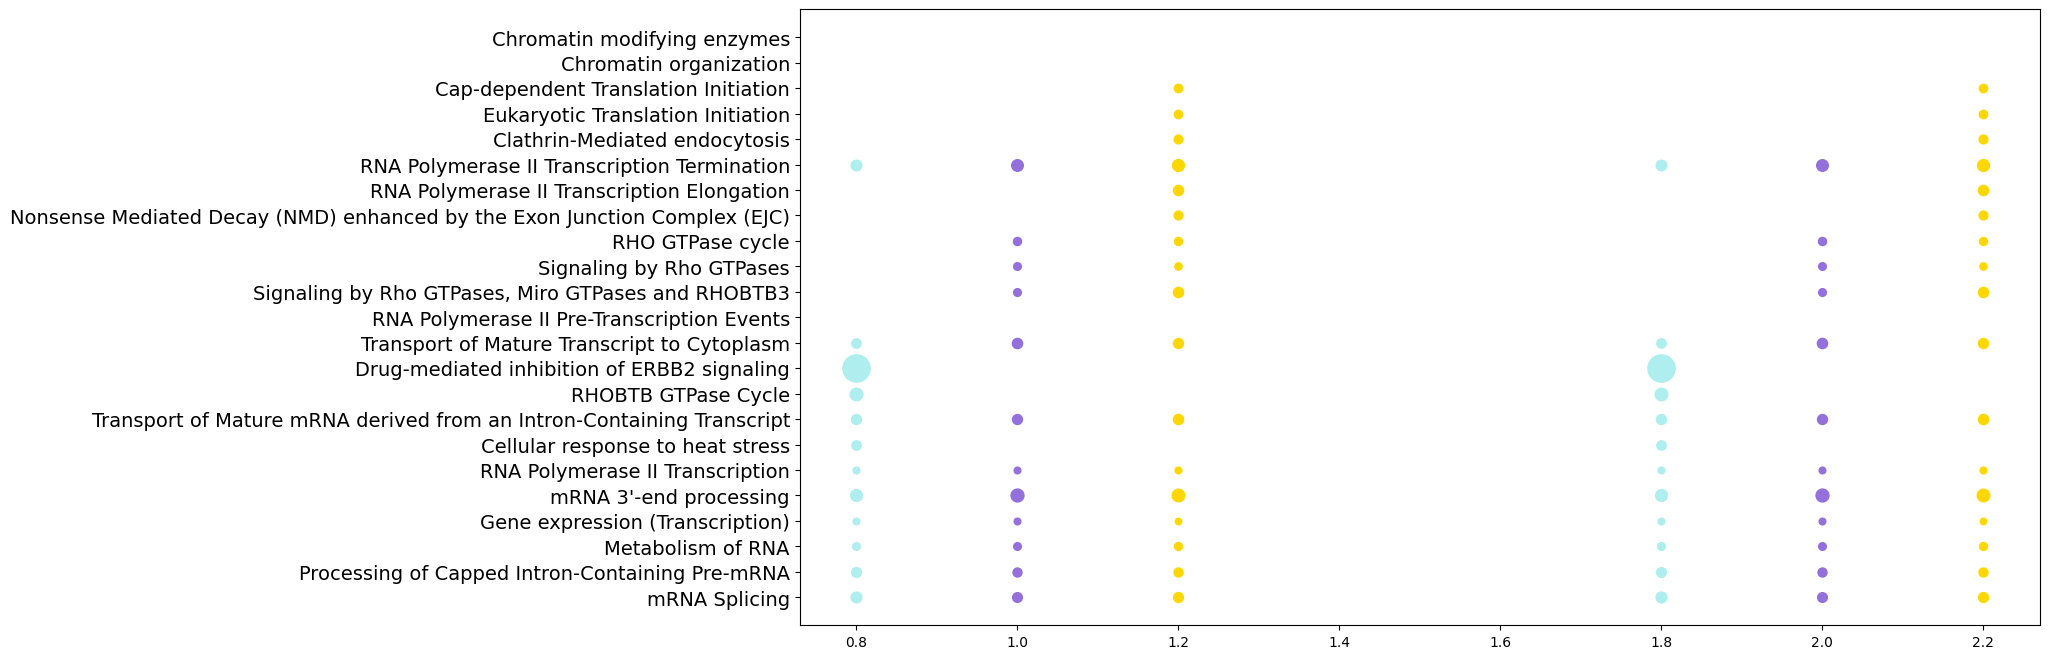

In [11]:
import math

fig, ax = plt.subplots(1,1, figsize=(16, 8))
c = 10
for i, pathway in enumerate(df_pathways['Reactome pathways']):
    row = df_pathways.iloc[i]
    
    off = [-.2, 0, .2]
    
    for j, genotype in enumerate(genotypes):
        fe1 = row[f'Fold_enrich_{genotype} T1']
        fe6 = row[f'Fold_enrich_{genotype} T1']
        
        fe1 = fe1 if not math.isnan(fe1) else 0
        fe6 = fe6 if not math.isnan(fe6) else 0
        #print(fe)
        ax.scatter(1+off[j], i, color=color_dict[genotype], s=c*fe1)
        ax.scatter(2+off[j], i, color=color_dict[genotype], s=c*fe6)
        #ax.scatter(1, i, color=dict[genotype], marker='o', s=c*row[f'Fold_enrich_{genotype} T1'])
        #ax.scatter(2, i, color=dict[genotype], marker='o', s=c*row[f'Fold_enrich_{genotype} T6'])

#ax.set_xlim(2, 10)
    
    #ax.scatter(data[0][1], 1)
ax.set_yticks(np.arange(len(pathways)), pathways, fontsize=14)

plt.show()

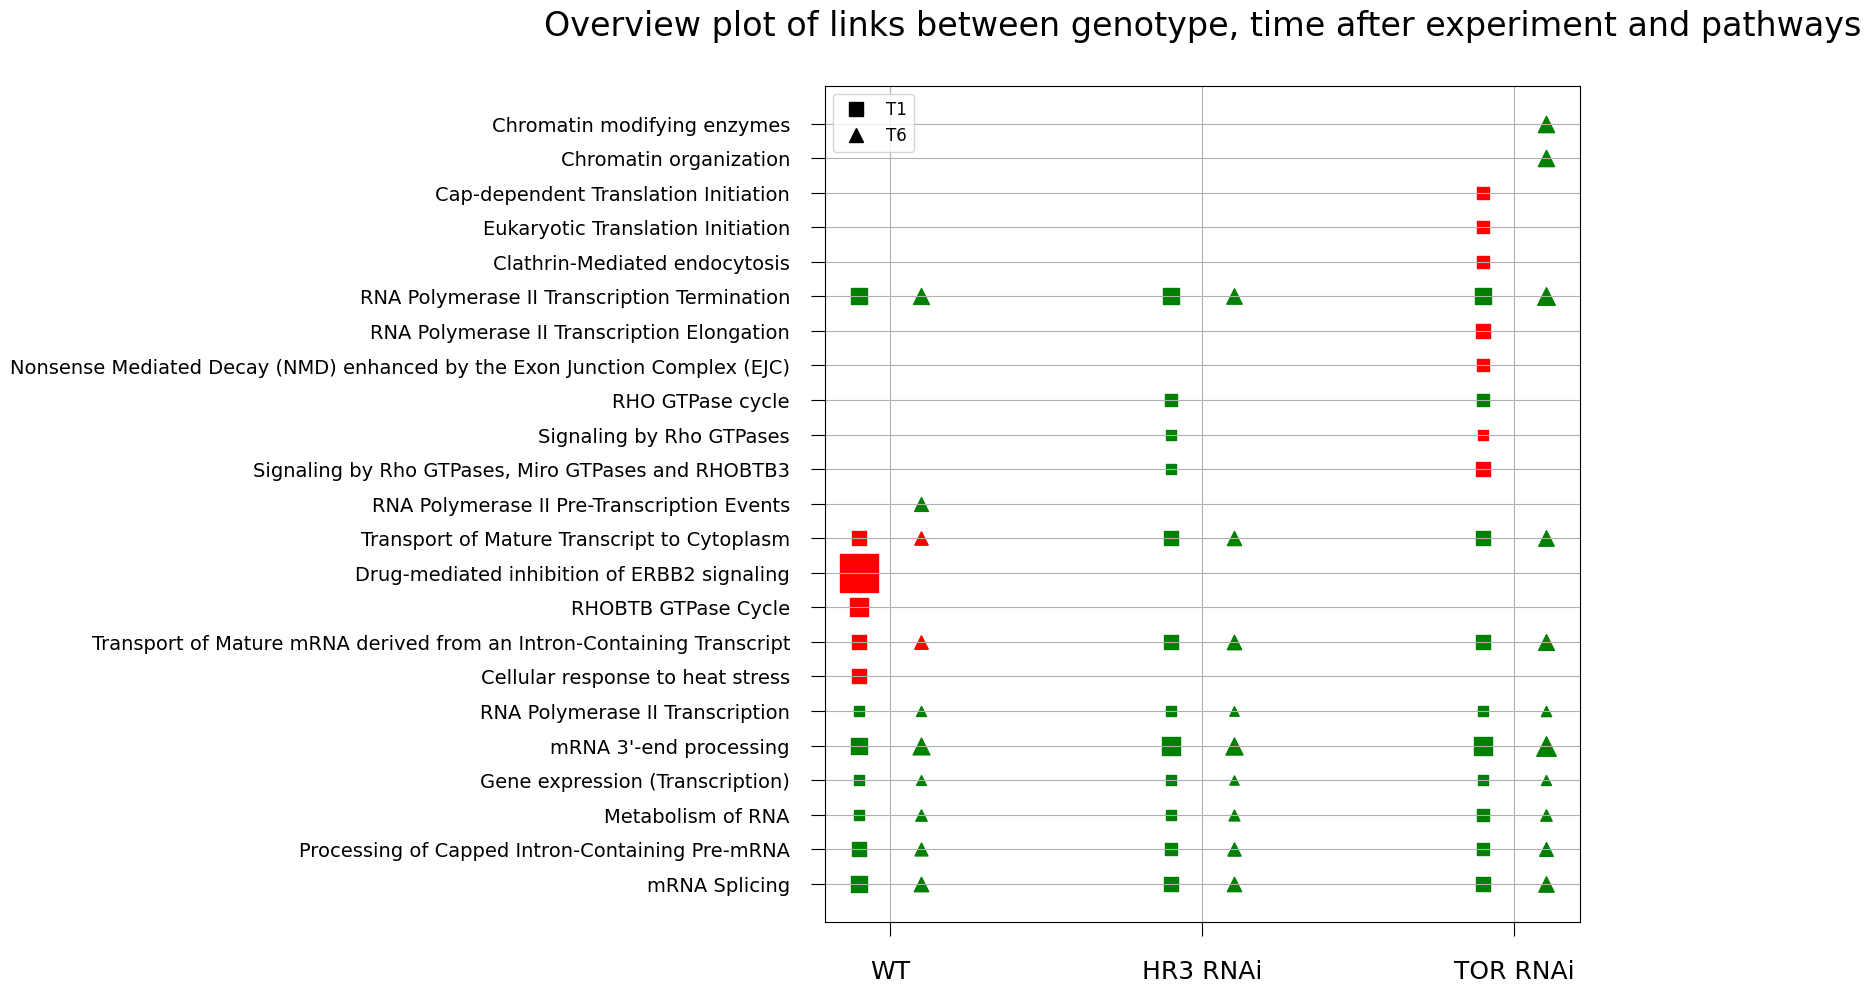

In [68]:
### THIS IS WITH 99% SIGNIFICANCE ###

import math

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(16, 10))
c = 20
for i, pathway in enumerate(df_pathways['Reactome pathways']):
    row = df_pathways.iloc[i]
    
    x = [1, 2, 3]
    
    for j, genotype in enumerate(genotypes):
        fe1 = row[f'Fold_enrich_{genotype} T1']
        fe6 = row[f'Fold_enrich_{genotype} T6']
        
        fe1 = fe1 if not math.isnan(fe1) else 0
        fe6 = fe6 if not math.isnan(fe6) else 0
        
        fdr1 = row[f'FDR {genotype} T1']
        color1 = 'green' if fdr1 < 0.01 else 'red'  # Choose colors based on FDR significance
        
        fdr6 = row[f'FDR {genotype} T6']
        color6 = 'green' if fdr6 < 0.01 else 'red'  # Choose colors based on FDR significance
        
        ax.scatter(x[j]-.1, i, color=color1, marker='s', s=c*fe1, label='T1')
        ax.scatter(x[j]+.1, i, color=color6, marker='^', s=c*fe6, label='T6')

ax.set_yticks(np.arange(len(pathways)), pathways, fontsize=14)
ax.set_xticks([1,2,3], ['WT', 'HR3 RNAi', 'TOR RNAi'], fontsize=18, ha='center', va='top', position=(0,-0.003)) # Move the genotype labels further down by setting their y-position
ax.grid(True)

# Set longer tick marks and move y-axis labels away from the plot
ax.tick_params(axis='both', which='both', length=10, pad=15)

t1_dot = mlines.Line2D([], [], color='k', marker='s', linestyle='None',
                          markersize=10, label='T1')
t6_dot = mlines.Line2D([], [], color='k', marker='^', linestyle='None',
                          markersize=10, label='T6')

ax.legend(handles=[t1_dot, t6_dot], fontsize=12, loc='upper left')

ax.set_title('Overview plot of links between genotype, time after experiment and pathways', fontsize=24, y=1.05)
plt.tight_layout()
plt.show()

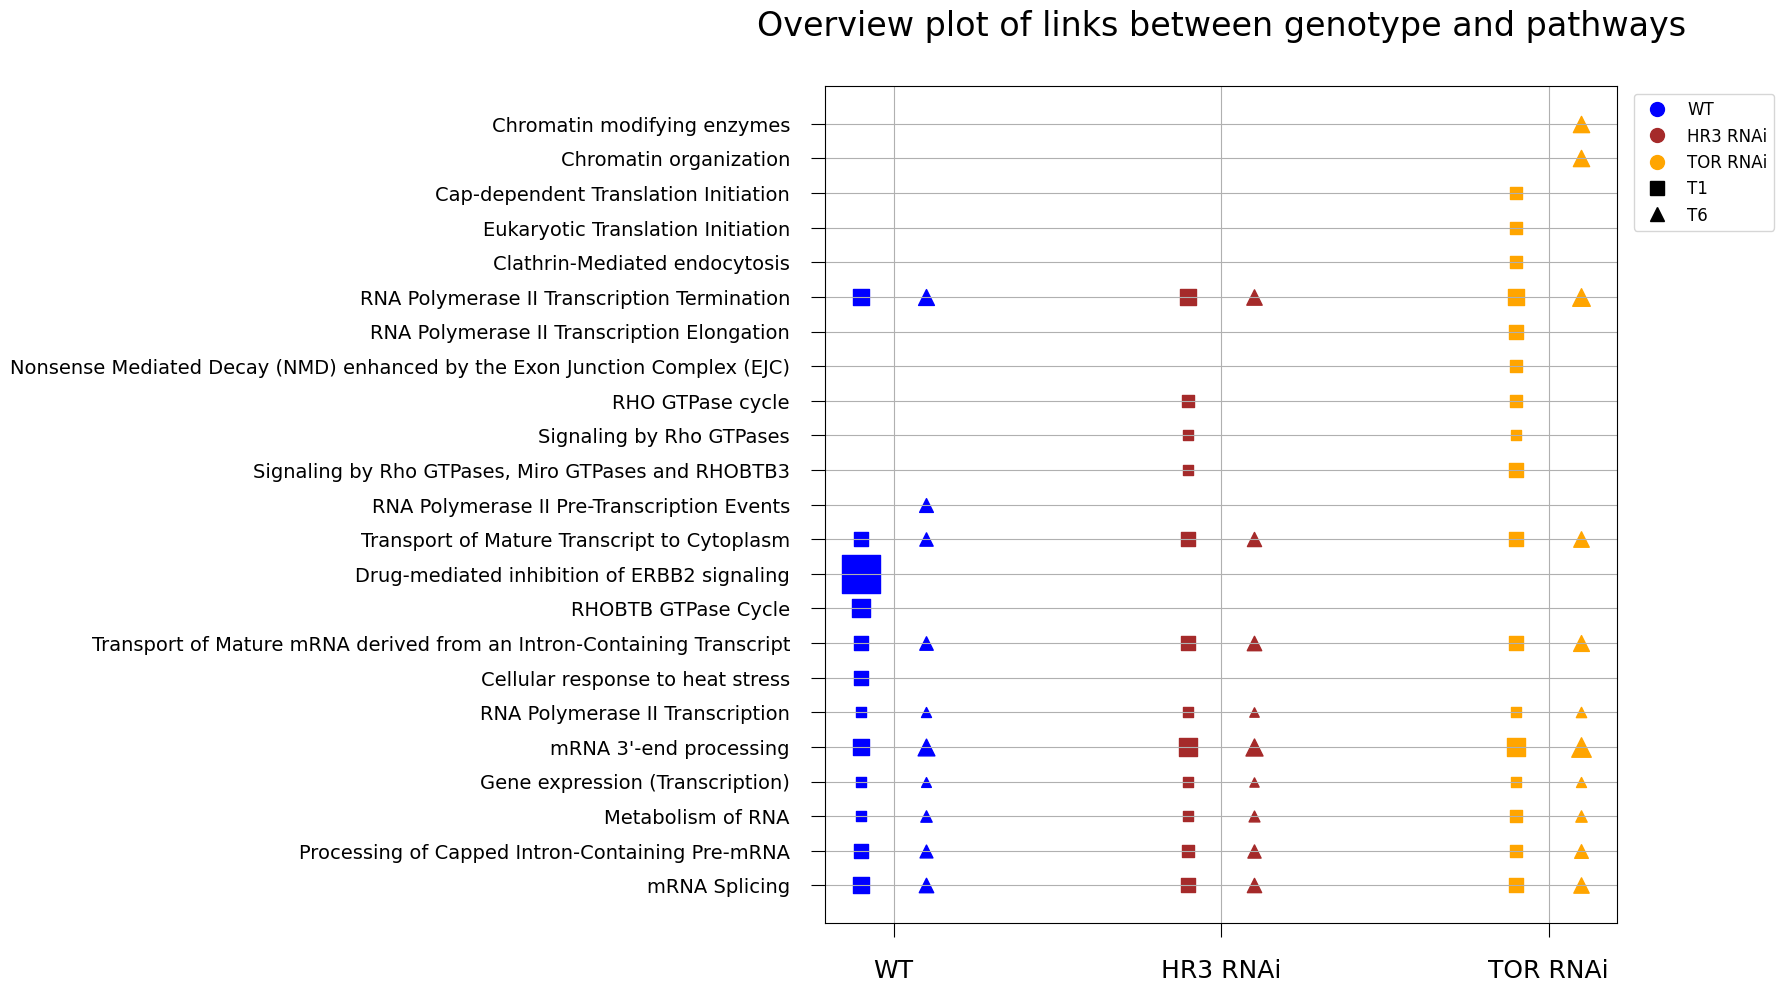

In [73]:
### THIS IS WITH 95% SIGNIFICANCE ###

import math

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

color_dict_95 = {
    'WT': 'blue',
    'HR3': 'brown',
    'TOR': 'orange'
}

fig, ax = plt.subplots(1,1, figsize=(18, 10))
c = 20
for i, pathway in enumerate(df_pathways['Reactome pathways']):
    row = df_pathways.iloc[i]
    
    x = [1, 2, 3]
    
    for j, genotype in enumerate(genotypes):
        fe1 = row[f'Fold_enrich_{genotype} T1']
        fe6 = row[f'Fold_enrich_{genotype} T6']
        
        fe1 = fe1 if not math.isnan(fe1) else 0
        fe6 = fe6 if not math.isnan(fe6) else 0
        #print(fe)
        ax.scatter(x[j]-.1, i, marker='s', s=c*fe1, label='T1', color=color_dict_95[genotype])
        ax.scatter(x[j]+.1, i, marker='^', s=c*fe6, label='T6', color=color_dict_95[genotype])

ax.set_yticks(np.arange(len(pathways)), pathways, fontsize=14)
ax.set_xticks([1,2,3], ['WT', 'HR3 RNAi', 'TOR RNAi'], fontsize=18)
ax.grid(True)

# Move the genotype labels further down by setting their y-position
ax.set_xticks([1,2,3], ['WT', 'HR3 RNAi', 'TOR RNAi'], fontsize=18, ha='center', va='top', position=(0,-0.001))

# Set longer tick marks and move y-axis labels away from the plot
ax.tick_params(axis='both', which='both', length=10, pad=15)

wt_dot = mlines.Line2D([], [], color=color_dict_95['WT'], marker='o', linestyle='None',
                          markersize=10, label='WT')
hr3_dot = mlines.Line2D([], [], color=color_dict_95['HR3'], marker='o', linestyle='None',
                          markersize=10, label='HR3 RNAi')
tor_dot = mlines.Line2D([], [], color=color_dict_95['TOR'], marker='o', linestyle='None',
                          markersize=10, label='TOR RNAi')
t1_dot = mlines.Line2D([], [], color='k', marker='s', linestyle='None',
                          markersize=10, label='T1')
t6_dot = mlines.Line2D([], [], color='k', marker='^', linestyle='None',
                          markersize=10, label='T6')

ax.legend(handles=[wt_dot, hr3_dot, tor_dot, t1_dot, t6_dot], fontsize=12, bbox_to_anchor=(1.01, 1))

ax.set_title('Overview plot of links between genotype and pathways', fontsize=24, y=1.05)
plt.tight_layout()
plt.show()

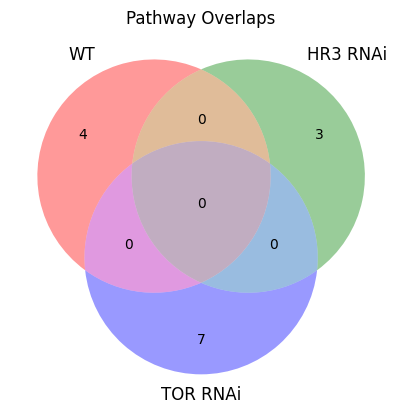

In [15]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

# Define the sets for each genotype
wt_pathways = set([
    'Cellular response to heat stress',
    'RHOBTB GTPase Cycle',
    'Drug-mediated inhibition of ERBB2 signaling',
    'RNA polymerase II Pre-trancription Events'
])

hr3_pathways = set([
    'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
    'Signaling by Rho GTPases',
    'RHO GTPase cycle'
])

tor_pathways = set([
    'Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)',
    'RNA Polymerase II Transcription Elongation',
    'Clathrin-Mediated endocytosis',
    'Eukaryotic Translation Initiation',
    'Cap-dependent Translation Initiation',
    'Chromatin organization',
    'Chromatin modifying enzymes'
])

# Calculate pathway counts
wt_count = len(wt_pathways)
hr3_count = len(hr3_pathways)
tor_count = len(tor_pathways)
wt_hr3_count = len(wt_pathways.intersection(hr3_pathways))
wt_tor_count = len(wt_pathways.intersection(tor_pathways))
hr3_tor_count = len(hr3_pathways.intersection(tor_pathways))
wt_hr3_tor_count = len(wt_pathways.intersection(hr3_pathways, tor_pathways))

# Create the Venn diagram
venn = venn3_unweighted(subsets=(wt_count, hr3_count, wt_hr3_count, tor_count,
                                 wt_tor_count, hr3_tor_count, wt_hr3_tor_count),
                        set_labels=('WT', 'HR3 RNAi', 'TOR RNAi'))

# Customize the diagram
venn.get_label_by_id('100').set_text(f'{wt_count}')
venn.get_label_by_id('010').set_text(f'{hr3_count}')
venn.get_label_by_id('001').set_text(f'{tor_count}')

# Set title and display the plot
plt.title('Pathway Overlaps')
plt.show()

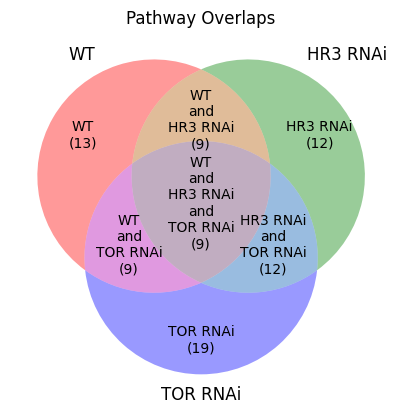

In [16]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

# Define the sets for each genotype
wt_pathways = set([
    'Cellular response to heat stress',
    'RHOBTB GTPase Cycle',
    'Drug-mediated inhibition of ERBB2 signaling',
    'RNA polymerase II Pre-trancription Events',
    'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination'])

hr3_pathways = set([
    'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
    'Signaling by Rho GTPases',
    'RHO GTPase cycle', 'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination',
      'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
      'Signaling by Rho GTPases',
      'RHO GTPase cycle'])

tor_pathways = set([
    'Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)',
    'RNA Polymerase II Transcription Elongation',
    'Clathrin-Mediated endocytosis',
    'Eukaryotic Translation Initiation',
    'Cap-dependent Translation Initiation',
    'Chromatin organization',
    'Chromatin modifying enzymes', 'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination',
      'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
      'Signaling by Rho GTPases',
      'RHO GTPase cycle'])

# Calculate pathway counts
wt_count = len(wt_pathways)
hr3_count = len(hr3_pathways)
tor_count = len(tor_pathways)
wt_hr3_count = len(wt_pathways.intersection(hr3_pathways))
wt_tor_count = len(wt_pathways.intersection(tor_pathways))
hr3_tor_count = len(hr3_pathways.intersection(tor_pathways))
wt_hr3_tor_count = len(wt_pathways.intersection(hr3_pathways, tor_pathways))

# Create the Venn diagram
venn = venn3_unweighted(
    subsets=(wt_count, hr3_count, wt_hr3_count, tor_count, wt_tor_count, hr3_tor_count, wt_hr3_tor_count),
    set_labels=('WT', 'HR3 RNAi', 'TOR RNAi')
)

# Customize the diagram
venn.get_label_by_id('100').set_text(f'WT\n({wt_count})')
venn.get_label_by_id('010').set_text(f'HR3 RNAi\n({hr3_count})')
venn.get_label_by_id('001').set_text(f'TOR RNAi\n({tor_count})')

venn.get_label_by_id('110').set_text(f'WT\nand\nHR3 RNAi\n({wt_hr3_count})')
venn.get_label_by_id('101').set_text(f'WT\nand\nTOR RNAi\n({wt_tor_count})')
venn.get_label_by_id('011').set_text(f'HR3 RNAi\nand\nTOR RNAi\n({hr3_tor_count})')

venn.get_label_by_id('111').set_text(f'WT\nand\nHR3 RNAi\nand\nTOR RNAi\n({wt_hr3_tor_count})')

# Set title and display the plot
plt.title('Pathway Overlaps')
plt.show()

In [ ]:
import os
os.getcwd()

os.chdir('/Users/ninazomorrodnia/Desktop')

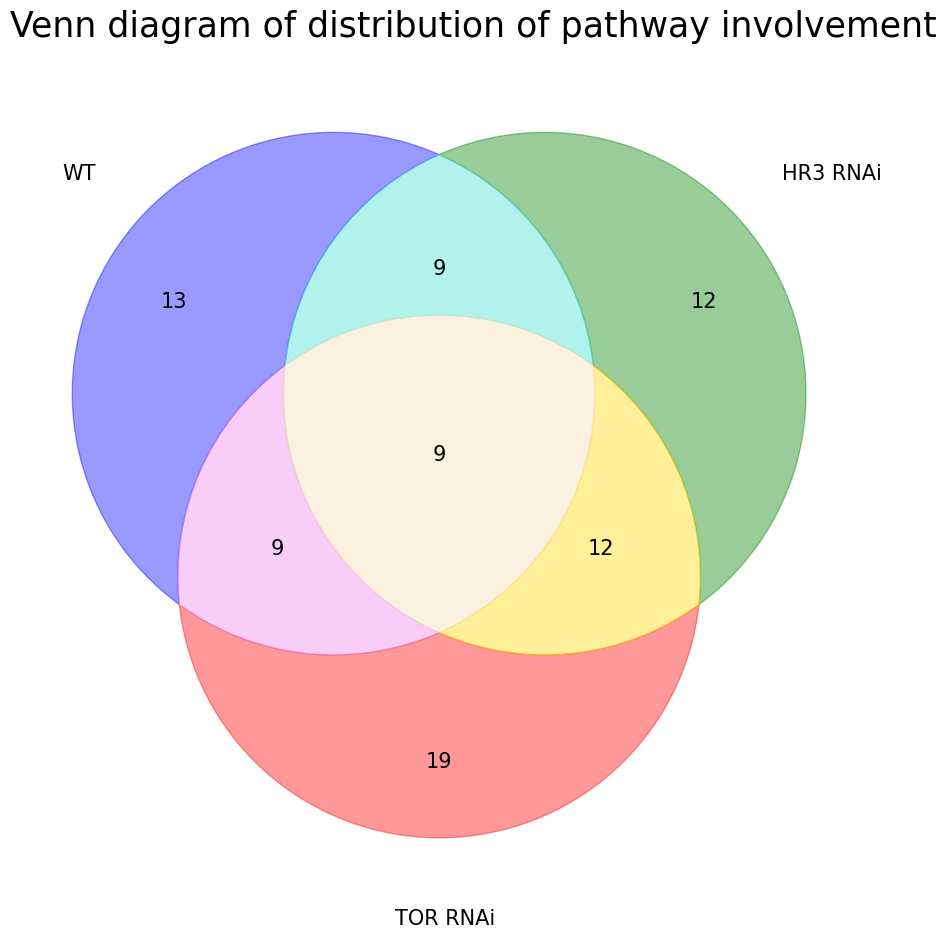

In [17]:
from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# Define the sets for each genotype
wt_pathways = set([
    'Cellular response to heat stress',
    'RHOBTB GTPase Cycle',
    'Drug-mediated inhibition of ERBB2 signaling',
    'RNA polymerase II Pre-trancription Events',
    'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination'])

hr3_pathways = set([
    'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
    'Signaling by Rho GTPases',
    'RHO GTPase cycle', 'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination',
      'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
      'Signaling by Rho GTPases',
      'RHO GTPase cycle'])

tor_pathways = set([
    'Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)',
    'RNA Polymerase II Transcription Elongation',
    'Clathrin-Mediated endocytosis',
    'Eukaryotic Translation Initiation',
    'Cap-dependent Translation Initiation',
    'Chromatin organization',
    'Chromatin modifying enzymes', 'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination',
      'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
      'Signaling by Rho GTPases',
      'RHO GTPase cycle'])

# Calculate pathway counts
wt_count = len(wt_pathways)
hr3_count = len(hr3_pathways)
tor_count = len(tor_pathways)
wt_hr3_count = len(wt_pathways.intersection(hr3_pathways))
wt_tor_count = len(wt_pathways.intersection(tor_pathways))
hr3_tor_count = len(hr3_pathways.intersection(tor_pathways))
wt_hr3_tor_count = len(wt_pathways.intersection(hr3_pathways, tor_pathways))

# Create the figure with larger figsize
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the values as needed

# Create the Venn diagram
venn = venn3_unweighted(subsets=(wt_count, hr3_count, wt_hr3_count, tor_count,
                                 wt_tor_count, hr3_tor_count, wt_hr3_tor_count),
                        set_labels=('WT', 'HR3 RNAi', 'TOR RNAi'))

# Customize the diagram
venn.get_label_by_id('100').set_text(f'{wt_count}')
venn.get_label_by_id('010').set_text(f'{hr3_count}')
venn.get_label_by_id('001').set_text(f'{tor_count}')
venn.get_label_by_id('110').set_text(f'{wt_hr3_count}')
venn.get_label_by_id('101').set_text(f'{wt_tor_count}')
venn.get_label_by_id('011').set_text(f'{hr3_tor_count}')
venn.get_label_by_id('111').set_text(f'{wt_hr3_tor_count}')

# Set colors for each subset
venn.get_patch_by_id('100').set_color('blue')       # Only WT
venn.get_patch_by_id('010').set_color('green')    # Only HR3 RNAi
venn.get_patch_by_id('001').set_color('red')     # Only TOR RNAi
venn.get_patch_by_id('110').set_color('turquoise')        # WT and HR3 RNAi
venn.get_patch_by_id('101').set_color('violet')        # WT and TOR RNAi
venn.get_patch_by_id('011').set_color('gold')          # HR3 RNAi and TOR RNAi
venn.get_patch_by_id('111').set_color('wheat')          # WT, HR3 RNAi, and TOR RNAi


# Set font properties for the labels
font = FontProperties(family='DejaVu Sans', size=15)
for text in venn.set_labels:
    text.set_fontproperties(font)
    if text.get_text() == 'WT':
        text.set_position((-0.56, 0.45))
    elif text.get_text() == 'HR3 RNAi':
        text.set_position((0.56, 0.45))
    elif text.get_text() == 'TOR RNAi':
        text.set_position((0.01, -0.74))
    

    
only_WT = venn.get_label_by_id('100').set_fontproperties(font)
only_HR3_RNAi = venn.get_label_by_id('010').set_fontproperties(font)
only_TOR_RNAi = venn.get_label_by_id('001').set_fontproperties(font)
WT_HR3_RNAi = venn.get_label_by_id('110').set_fontproperties(font)
WT_TOR_RNAi = venn.get_label_by_id('101').set_fontproperties(font)
HR3_RNAi_TOR_RNAi = venn.get_label_by_id('011').set_fontproperties(font)
all_genotypes = venn.get_label_by_id('111').set_fontproperties(font)


# Set title and adjust plot layout
title = plt.title('Venn diagram of distribution of pathway involvement', fontproperties=font, size=25, pad=25)  # Increase the 'pad' value to add more spacing
title.set_position([0.54, 5])  # Set the position of the title to be centered

plt.subplots_adjust(top=0.8)  # Adjust the top margin to increase the spacing

# Save the plot to a file
plt.savefig('venn_plot_pathway_oldphospho.png')

plt.show()

In [35]:
# Define the sets for each genotype
wt_pathways = set([
    'Cellular response to heat stress',
    'RHOBTB GTPase Cycle',
    'Drug-mediated inhibition of ERBB2 signaling',
    'RNA polymerase II Pre-trancription Events',
    'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination'])

hr3_pathways = set([
    'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
    'Signaling by Rho GTPases',
    'RHO GTPase cycle', 'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination',
      'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
      'Signaling by Rho GTPases',
      'RHO GTPase cycle'])

tor_pathways = set([
    'Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)',
    'RNA Polymerase II Transcription Elongation',
    'Clathrin-Mediated endocytosis',
    'Eukaryotic Translation Initiation',
    'Cap-dependent Translation Initiation',
    'Chromatin organization',
    'Chromatin modifying enzymes', 'RNA Polymerase II Transcription', 
     'mRNA 3’-end processing', 'Gene expression (Transcription)', 
     'Metabolism of RNA', 
     'Processing of Capped Intron-Containing Pre-mRNA',
     'mRNA Splicing',
      'Transport of Mature mRNA derived from an Intron Containing Trancript',
      'Transport of Mature transcript to Cytoplasm',
      'RNA Polymerase II Transcription Termination',
      'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
      'Signaling by Rho GTPases',
      'RHO GTPase cycle'])


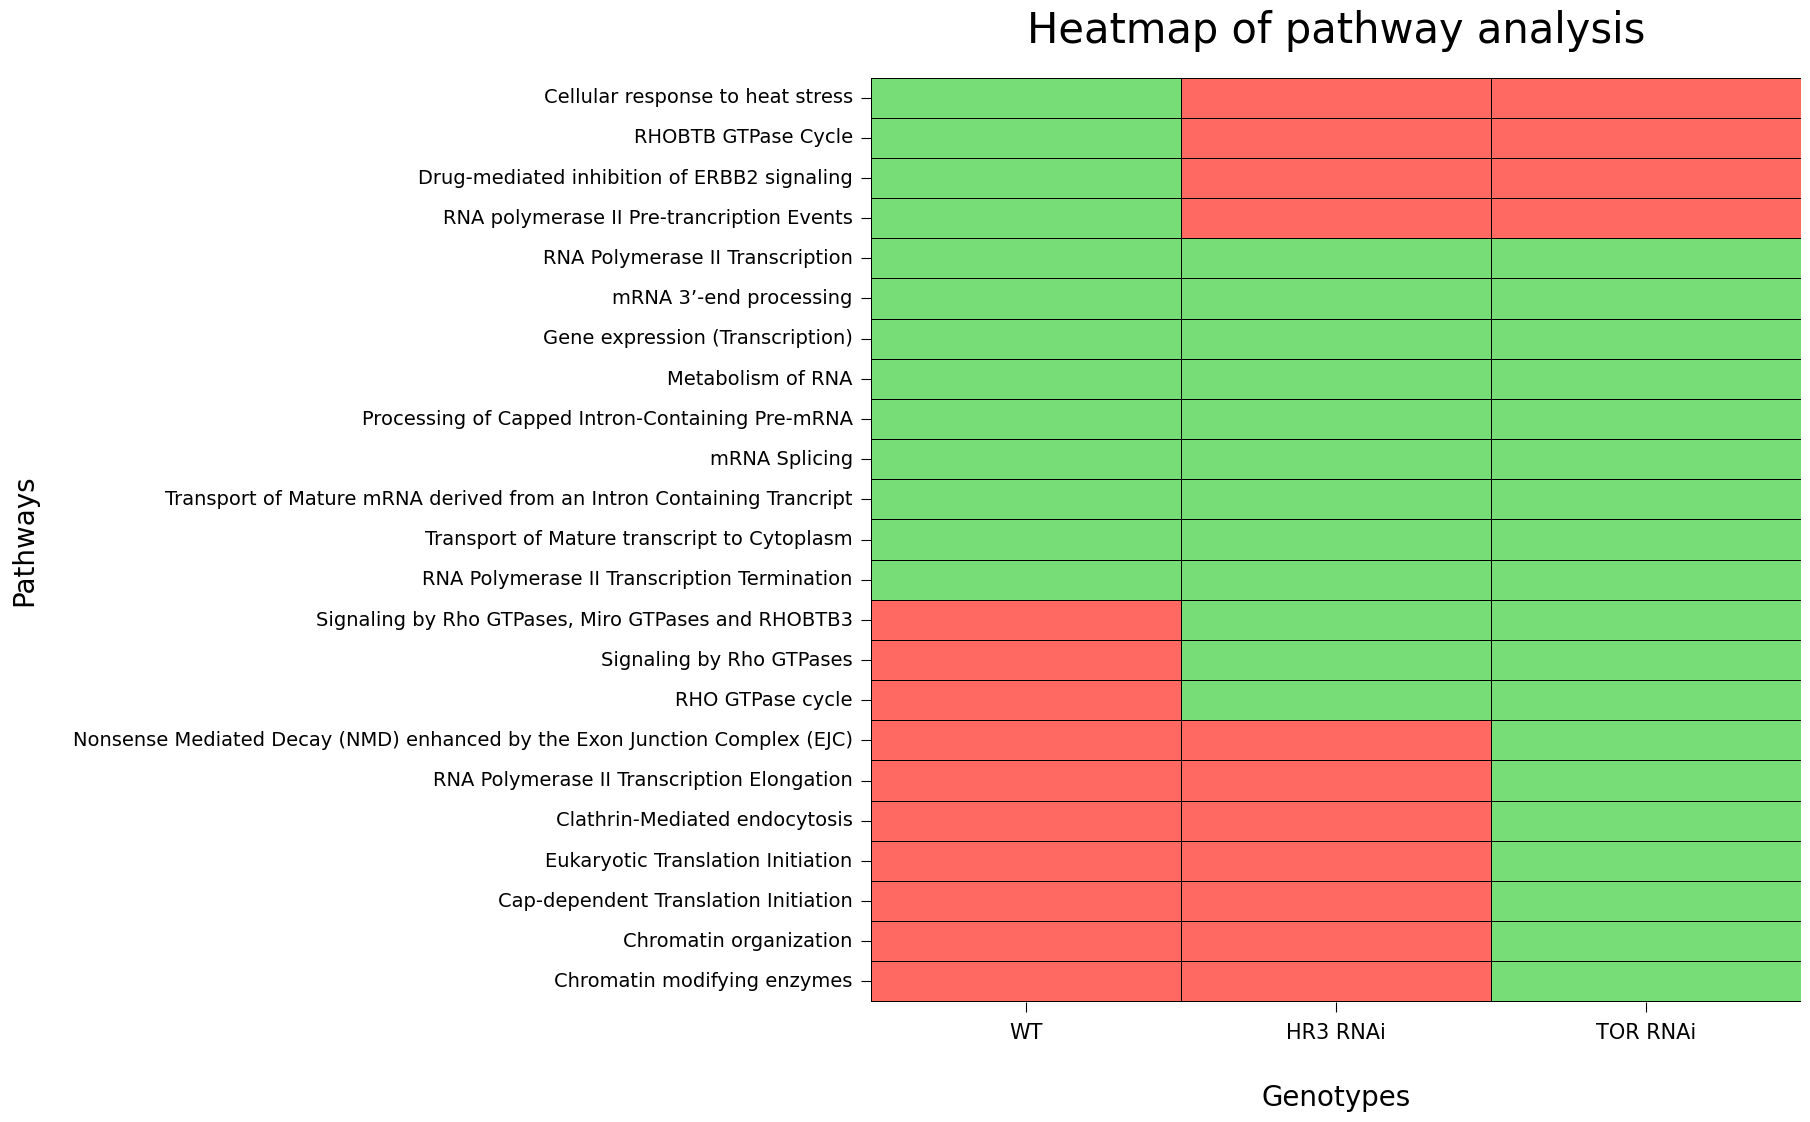

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as font_manager

# Define the pathway and genotype labels
pathway_labels = [
    'Cellular response to heat stress',
    'RHOBTB GTPase Cycle',
    'Drug-mediated inhibition of ERBB2 signaling',
    'RNA polymerase II Pre-trancription Events',
    'RNA Polymerase II Transcription', 
    'mRNA 3’-end processing',
    'Gene expression (Transcription)', 
    'Metabolism of RNA', 
    'Processing of Capped Intron-Containing Pre-mRNA',
    'mRNA Splicing',
    'Transport of Mature mRNA derived from an Intron Containing Trancript',
    'Transport of Mature transcript to Cytoplasm',
    'RNA Polymerase II Transcription Termination',
    'Signaling by Rho GTPases, Miro GTPases and RHOBTB3',
    'Signaling by Rho GTPases',
    'RHO GTPase cycle',
    'Nonsense Mediated Decay (NMD) enhanced by the Exon Junction Complex (EJC)',
    'RNA Polymerase II Transcription Elongation',
    'Clathrin-Mediated endocytosis',
    'Eukaryotic Translation Initiation',
    'Cap-dependent Translation Initiation',
    'Chromatin organization',
    'Chromatin modifying enzymes'
]

genotype_labels = ['WT', 'HR3 RNAi', 'TOR RNAi']


# Create the figure with larger figsize
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the values as needed

# Create a presence/absence matrix
presence_matrix = []
for pathway in pathway_labels:
    presence_row = []
    for genotype in genotype_labels:
        if (genotype == 'WT' and pathway in wt_pathways) or \
           (genotype == 'HR3 RNAi' and pathway in hr3_pathways) or \
           (genotype == 'TOR RNAi' and pathway in tor_pathways):
            presence_row.append(1)  # Green
        else:
            presence_row.append(0)  # Red
    presence_matrix.append(presence_row)

# Create a dataframe from the presence matrix
df = pd.DataFrame(presence_matrix, columns=genotype_labels, index=pathway_labels)

# Create the heatmap using seaborn with red and green colors
cmap = sns.color_palette(['#FF6961', '#77DD77'])
sns.heatmap(df, cmap=cmap, cbar=False, linewidths=0.5, linecolor='black', annot=False)

# Customize the plot
plt.xlabel('Genotypes')
plt.ylabel('Pathways')

# Adjust the position of the y-axis label
plt.ylabel('Pathways', labelpad=25, size=20)
plt.xlabel('Genotypes', labelpad=30, size=20)

# Increase the fontsize of 'WT', 'HR3 RNAi', and 'TOR RNAi' labels
ax.tick_params(axis="x", which="both", labelsize=15, pad=8, length=7)  # Adjust the fontsize as needed
ax.tick_params(axis="y", which="both", labelsize=14, pad=6, length=7)  # Adjust the fontsize as needed

# Set title and adjust plot layout
title = plt.title('Heatmap of pathway analysis', fontproperties=font, size=30, pad=25)  # Increase the 'pad' value to add more spacing


# Show the plot
plt.show()